In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from functions import data_loaders, train, test, save
from fnn import FNN

## Training

In [2]:
torch.manual_seed(43)

criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_loader, test_loader = data_loaders()

model = FNN().to(device)
optimizer = optim.Adam(model.parameters())

In [3]:
%%time
steps, losses = train(model, device, train_loader, criterion, optimizer)

Train:
Epoch: 2	Loss: 0.0680
Epoch: 4	Loss: 0.0842
Epoch: 6	Loss: 0.0444
Epoch: 8	Loss: 0.0058
Epoch: 10	Loss: 0.0563
Epoch: 12	Loss: 0.0367
Epoch: 14	Loss: 0.0817
Epoch: 16	Loss: 0.0416
Epoch: 18	Loss: 0.0128
Epoch: 20	Loss: 0.0523
Epoch: 22	Loss: 0.0786
Epoch: 24	Loss: 0.0061
Time: 00:00:33
CPU times: user 23 s, sys: 6.58 s, total: 29.6 s
Wall time: 33.7 s


## Results

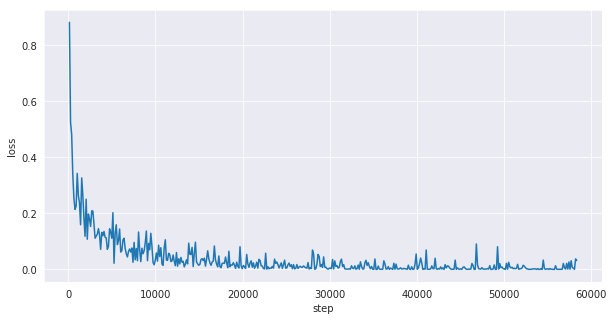

In [4]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(10,5)
sns.lineplot(x=steps, y=losses).set(xlabel='step', ylabel='loss')
plt.show()

In [5]:
test(model, device, test_loader, criterion)
save(model)

Test:
Average loss: 0.0008	Accuracy: 97.99
